# Table of Contents

- Introduction.

- Data Processing.

- Visualization.

- Convert category to label encoder.

- Model.
    - Naive Bayse.
    - Decision Tree.
    - Random Forest.
- PCA.
    - Naive Bayse with PCA.
    - Decision Tree with PCA.
    - Random Forest with PCA.
- GridsearchCV.
    - Decision Tree.
    - Random Forest.

# Introduction

Tập dư liệu Airline Arrivals [http://stat-computing.org/dataexpo/2009/the-data.html](http://) dùng dể dự đoán khi nào chuyến bay sẽ bị trễ. Một chuyến bay trễ khi nó có thời gian khởi hành thực tế bị trễ hơn 30 phút so với thời gian dự kiến.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import tree


In [2]:
data = pd.read_csv('../input/airline-delay/2008.csv')

In [3]:
data.shape

(7009728, 29)

Dữ liệu gồm hơn 7 triêu dòng và 29 cột.

Lấy random 1 triệu dòng từ dữ liệu.

In [4]:
data = data.sample(n=1000000)

In [5]:
data.shape

(1000000, 29)

In [6]:
data.reset_index(inplace=True)
data.drop(columns=['index'], inplace=True)

In [7]:
pd.set_option('display.max_columns', None) 
data.head(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,7,20,7,2136.0,2030,2251.0,2203,OO,5488,N236SW,75.0,93.0,59.0,48.0,66.0,SFO,MFR,329,5.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,48.0
1,2008,11,18,2,612.0,615,737.0,735,WN,325,N386SW,85.0,80.0,68.0,2.0,-3.0,OMA,MDW,423,4.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,10,17,5,1730.0,1735,1903.0,1855,EV,5120,N823AS,93.0,80.0,61.0,8.0,-5.0,GNV,ATL,300,17.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,9,16,2,1223.0,1232,1637.0,1620,AA,1416,N079AA,254.0,228.0,212.0,17.0,-9.0,SJU,JFK,1597,14.0,28.0,0,NaN,0,0.0,0.0,17.0,0.0,0.0
4,2008,3,20,4,556.0,600,645.0,700,MQ,3654,N935AE,49.0,60.0,38.0,-15.0,-4.0,FSM,DFW,228,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,18,5,859.0,905,947.0,1005,MQ,4669,N718AE,48.0,60.0,35.0,-18.0,-6.0,RDU,DCA,227,2.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,7,23,3,1257.0,1250,1531.0,1519,NW,647,N341NW,214.0,209.0,197.0,12.0,7.0,RSW,MSP,1416,4.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,9,14,7,746.0,750,849.0,900,WN,2,N669SW,63.0,70.0,49.0,-11.0,-4.0,DAL,AMA,324,5.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,11,26,3,1051.0,1055,1212.0,1229,OO,4454,N608SK,81.0,94.0,63.0,-17.0,-4.0,DEN,SLC,391,4.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,3,26,3,2101.0,2105,2216.0,2221,YV,7100,N434YV,75.0,76.0,57.0,-5.0,-4.0,DEN,MTJ,197,4.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Dữ liệu gồm cả dạng số và category.


Mô tả dữ liệu:

1	Year	1987-2008

2	Month	1-12

3	DayofMonth	1-31

4	DayOfWeek	1 (Monday) - 7 (Sunday)

5	DepTime	actual departure time (local, hhmm)

6	CRSDepTime	scheduled departure time (local, hhmm)

7	ArrTime	actual arrival time (local, hhmm)

8	CRSArrTime	scheduled arrival time (local, hhmm)

9	UniqueCarrier	unique carrier code

10	FlightNum	flight number

11	TailNum	plane tail number

12	ActualElapsedTime	in minutes

13	CRSElapsedTime	in minutes

14	AirTime	in minutes

15	ArrDelay	arrival delay, in minutes

16	DepDelay	departure delay, in minutes

17	Origin	origin IATA airport code

18	Dest	destination IATA airport code

19	Distance	in miles

20	TaxiIn	taxi in time, in minutes

21	TaxiOut	taxi out time in minutes

22	Cancelled	was the flight cancelled?

23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

24	Diverted	1 = yes, 0 = no

25	CarrierDelay	in minutes

26	WeatherDelay	in minutes

27	NASDelay	in minutes

28	SecurityDelay	in minutes

29	LateAircraftDelay	in minutes

In [8]:
data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,980693.000000,1000000.000000,978493.000000,1000000.000000,1000000.000000,978047.000000,999874.000000,978047.000000,978047.000000,980693.000000,1000000.000000,978493.000000,980584.000000,1000000.000000,1000000.000000,217643.000000,217643.000000,217643.000000,217643.000000,217643.000000
mean,2008.0,6.381401,15.730192,3.925283,1333.555394,1325.809118,1481.513834,1494.954766,2227.338856,127.328363,128.857198,104.039136,8.187492,9.973315,726.405506,6.858149,16.440206,0.019477,0.002476,15.764316,3.050794,17.135051,0.067560,20.763402
std,0.0,3.407085,8.799141,1.988059,478.111213,464.319180,504.988391,482.463387,1965.206067,70.323747,69.524072,67.591533,38.449160,35.287937,563.115147,4.927476,11.283215,0.138194,0.049698,40.059121,19.646163,31.676588,1.680861,39.220843
min,2008.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,-141.000000,0.000000,-109.000000,-70.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,928.000000,925.000000,1107.000000,1115.000000,623.000000,77.000000,80.000000,55.000000,-10.000000,-4.000000,325.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,1325.000000,1320.000000,1512.000000,1517.000000,1572.000000,109.000000,110.000000,86.000000,-2.000000,-1.000000,580.000000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
75%,2008.0,9.000000,23.000000,6.000000,1728.000000,1715.000000,1909.000000,1907.000000,3527.000000,157.000000,159.000000,132.000000,12.000000,8.000000,951.000000,8.000000,19.000000,0.000000,0.000000,16.000000,0.000000,21.000000,0.000000,26.000000
max,2008.0,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9742.000000,1182.000000,660.000000,1154.000000,1655.000000,1597.000000,4962.000000,308.000000,386.000000,1.000000,1.000000,1552.000000,1070.000000,761.000000,209.000000,1236.000000


# Data Processing

Dữ liệu chỉ trên năm 2008 nên ta sẽ bỏ feature Year

In [9]:
data.drop(columns=['Year'], inplace=True)

Có một số giá trị âm là CRSElapsedTime, ArrDelay và DepDelay ArrDelay và DepDelay âm có thể do máy bay đến hoặc khởi hành sớm hơn dự kiến CRSElapsedTime có thể do nhập sai

In [10]:
data[data['CRSElapsedTime'] < 0]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
210409,7,22,2,1327.0,1330,1359.0,1109,HA,344,N485HA,32.0,-141.0,21.0,170.0,-3.0,LIH,HNL,102,5.0,6.0,0,NaN,0,170.0,0.0,0.0,0.0,0.0
405054,7,22,2,1328.0,1330,1356.0,1110,HA,165,N477HA,28.0,-140.0,20.0,166.0,-2.0,OGG,HNL,100,4.0,4.0,0,NaN,0,166.0,0.0,0.0,0.0,0.0
860514,4,11,5,725.0,710,NaN,645,OO,2631,N496CA,NaN,-25.0,NaN,NaN,15.0,MKG,MKE,85,NaN,8.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN


Chỉ có một số nhỏ giá trị CRSElapsedTime âm.

Ta sẽ lọa bỏ dòng có CRSElapsedTime chứa giá trị âm.

In [11]:
data.drop(data[data['CRSElapsedTime']<0].index, inplace=True)

Missing values

In [12]:
data.isnull().sum()*100/len(data)

Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               1.930706
CRSDepTime            0.000000
ArrTime               2.150606
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               1.196704
ActualElapsedTime     2.195207
CRSElapsedTime        0.012600
AirTime               2.195207
ArrDelay              2.195207
DepDelay              1.930706
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                2.150606
TaxiOut               1.941606
Cancelled             0.000000
CancellationCode     98.052294
Diverted              0.000000
CarrierDelay         78.235835
WeatherDelay         78.235835
NASDelay             78.235835
SecurityDelay        78.235835
LateAircraftDelay    78.235835
dtype: float64

CarrierDelay, WeatherDelay, NASDelay, SecurityDelay và LateAircraftDelay sẽ bằng NaN nếu không bị delay.

Giá trị DepDelay sẽ băng tổng 4 cột này cộng lại và cộng thêm 1 giá trị nào đó. Hơn nữa CarrierDelay, WeatherDelay, NASDelay, SecurityDelay và LateAircraftDelay có tỷ lệ missing value lớn nên ta se loại bỏ cột này.

CancellationCode có tỷ lệ missing value lớn nên ta se loại bỏ cột này.

Các cột DepTime, ArrTime, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, TaxiIn, TaxiOut có tỷ lệ missing values nhỏ nên ta sẽ loại bỏ các hàng chứa missing values

In [13]:
data.drop(columns=['CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 
                   'LateAircraftDelay'], inplace=True)

columns = ['DepTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
           'DepDelay', 'TaxiIn', 'TaxiOut', 'TailNum']
for column in columns:
    data = data.drop(data[data[column].isnull()].index)

In [14]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,7,20,7,2136.0,2030,2251.0,2203,OO,5488,N236SW,75.0,93.0,59.0,48.0,66.0,SFO,MFR,329,5.0,11.0,0,0
1,11,18,2,612.0,615,737.0,735,WN,325,N386SW,85.0,80.0,68.0,2.0,-3.0,OMA,MDW,423,4.0,13.0,0,0
2,10,17,5,1730.0,1735,1903.0,1855,EV,5120,N823AS,93.0,80.0,61.0,8.0,-5.0,GNV,ATL,300,17.0,15.0,0,0
3,9,16,2,1223.0,1232,1637.0,1620,AA,1416,N079AA,254.0,228.0,212.0,17.0,-9.0,SJU,JFK,1597,14.0,28.0,0,0
4,3,20,4,556.0,600,645.0,700,MQ,3654,N935AE,49.0,60.0,38.0,-15.0,-4.0,FSM,DFW,228,4.0,7.0,0,0


In [15]:
data.shape

(978045, 22)

## Tranform data

Biến đôi DepTime, CRSDepTime, ArrTime, CRSArrTime thành:

DepTime_Hours, DepTime_Minutes, CRSDepTime_Hours, CRSDepTime_Minutes, ArrTime_Hours, ArrTime_Minutes, CRSArrTime_Hours, CRSArrTime_Minutes.

In [16]:
def int_to_string(time_float):
    time_int = int(time_float)
    time_string = str(time_int)
    if(len(time_string) == 1):
        time_string = '000' + time_string
    elif(len(time_string) == 2):
        time_string = '00' + time_string
    return time_string

In [17]:
data['DepTime'] = data['DepTime'].apply(lambda x: int_to_string(x))
data['CRSDepTime'] = data['CRSDepTime'].apply(lambda x: int_to_string(x))
data['ArrTime'] = data['ArrTime'].apply(lambda x: int_to_string(x))
data['CRSArrTime'] = data['CRSArrTime'].apply(lambda x: int_to_string(x))

In [18]:
data['DepTimehhmm'] = pd.to_datetime(data['DepTime'], errors ='coerce', format = '%H%M')
data['CRSDepTimehhmm'] = pd.to_datetime(data['CRSDepTime'], errors ='coerce', format = '%H%M')
data['ArrTimehhmm'] = pd.to_datetime(data['ArrTime'], errors ='coerce', format = '%H%M')
data['CRSArrTimehhmm'] = pd.to_datetime(data['CRSArrTime'], errors ='coerce', format = '%H%M')

Remove những những giá trị không hợp lệ

In [19]:
columns = ['DepTimehhmm', 'CRSDepTimehhmm', 'ArrTimehhmm', 'CRSArrTimehhmm']
for column in columns:
    data = data.drop(data[data[column].isnull()].index)

In [20]:
data['DepTime_Hours'] = data['DepTimehhmm'].dt.hour
data['DepTime_Minutes'] = data['DepTimehhmm'].dt.minute

data['CRSDepTime_Hours'] = data['CRSDepTimehhmm'].dt.hour
data['CRSDepTime_Minutes'] = data['CRSDepTimehhmm'].dt.minute

data['ArrTime_Hours'] = data['ArrTimehhmm'].dt.hour
data['ArrTime_Minutes'] = data['ArrTimehhmm'].dt.minute

data['CRSArr_Hours'] = data['CRSArrTimehhmm'].dt.hour
data['CRSArr_Minutes'] = data['CRSArrTimehhmm'].dt.minute

In [21]:
data.drop(columns=['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'DepTimehhmm', 'CRSDepTimehhmm',
                   'ArrTimehhmm', 'CRSArrTimehhmm'], inplace=True)

Thêm cột xác Delay, nếu chuyến bay khởi hành trễ hơn 30p thì giá trị cột Delay bằng True, ngược lại False.

In [22]:
data['Delay'] = data['DepDelay'].apply(lambda x: 1 if (x> 29) else 0)

In [23]:
data.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,DepTime_Hours,DepTime_Minutes,CRSDepTime_Hours,CRSDepTime_Minutes,ArrTime_Hours,ArrTime_Minutes,CRSArr_Hours,CRSArr_Minutes,Delay
0,7,20,7,OO,5488,N236SW,75.0,93.0,59.0,48.0,66.0,SFO,MFR,329,5.0,11.0,0,0,21,36,20,30,22,51,22,3,1
1,11,18,2,WN,325,N386SW,85.0,80.0,68.0,2.0,-3.0,OMA,MDW,423,4.0,13.0,0,0,6,12,6,15,7,37,7,35,0
2,10,17,5,EV,5120,N823AS,93.0,80.0,61.0,8.0,-5.0,GNV,ATL,300,17.0,15.0,0,0,17,30,17,35,19,3,18,55,0
3,9,16,2,AA,1416,N079AA,254.0,228.0,212.0,17.0,-9.0,SJU,JFK,1597,14.0,28.0,0,0,12,23,12,32,16,37,16,20,0
4,3,20,4,MQ,3654,N935AE,49.0,60.0,38.0,-15.0,-4.0,FSM,DFW,228,4.0,7.0,0,0,5,56,6,0,6,45,7,0,0


# Visualization

# Delay

In [28]:
len(data[data['Delay']==True])/len(data)

0.12147940088314807

Tỷ lệ Delay bằng 12% tổng số chuyến bay[](http://)

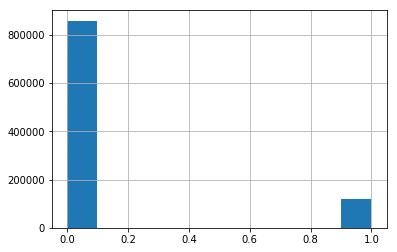

In [29]:
data['Delay'].hist()

# ActualElapsedTime

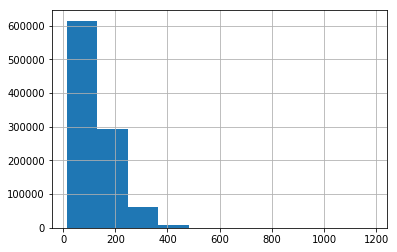

In [30]:
data.ActualElapsedTime.hist()

In [31]:
print('Tỷ lệ chuyến bay có ActualElapsedTime > 550: ', len(data[data['ActualElapsedTime'] > 550]) * 100 /len(data), '%')

Tỷ lệ chuyến bay có ActualElapsedTime > 550:  0.024037502595538843 %


Tỷ lệ chuyến bay có ActualElapsedTime lớn hơn 550 là rất nhó so với tổng số chuyến bay nên ta có sẽ remove nó.

In [33]:
data = data[data['ActualElapsedTime'] <= 550]

# ArrDelay

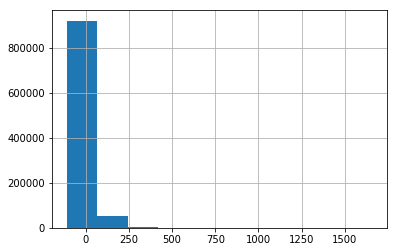

In [34]:
data.ArrDelay.hist()

In [35]:
print('Tỷ lệ chuyến bay có ArrDelay > 400: ', len(data[data['ArrDelay'] > 400]) * 100 /len(data), '%')

Tỷ lệ chuyến bay có ArrDelay > 400:  0.04951892973632193 %


Tỷ lệ chuyến bay có ArrDelay lớn hơn 400 là rất nhó so với tổng số chuyến bay nên ta có sẽ remove nó.

In [36]:
data = data[data['ArrDelay'] <= 400]

# Distance

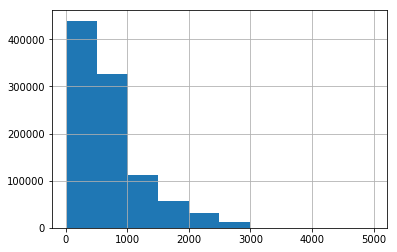

In [37]:
data.Distance.hist()

In [38]:
print('Tỷ lệ chuyến bay có Distance > 3500: ', len(data[data['Distance'] > 3500]) * 100 /len(data), '%')

Tỷ lệ chuyến bay có Distance > 3500:  0.09038611145231953 %


Tỷ lệ chuyến bay có ArrDelay lớn hơn 400 là rất nhó so với tổng số chuyến bay nên ta có sẽ remove nó.

In [39]:
data = data[data['Distance'] < 3500]

# TaxiIn

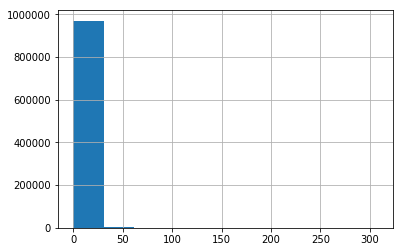

In [40]:
data.TaxiIn.hist()

In [41]:
print('Tỷ lệ chuyến bay có TaxiIn > 50: ', len(data[data['TaxiIn'] > 50]) * 100 /len(data), '%')

Tỷ lệ chuyến bay có TaxiIn > 50:  0.08770159327976296 %


Tỷ lệ chuyến bay có TaxiIn lớn hơn 50 là rất nhó so với tổng số chuyến bay nên ta có sẽ remove nó.

In [42]:
data = data[data['TaxiIn'] <= 50]

# TaxiOut

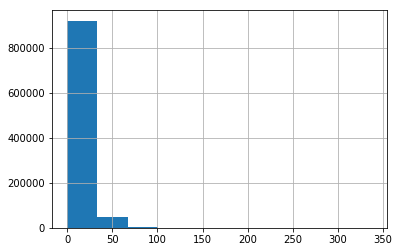

In [43]:
data.TaxiOut.hist()

In [44]:
print('Tỷ lệ chuyến bay có TaxiOut > 150: ', len(data[data['TaxiOut'] > 150]) * 100 /len(data), '%')

Tỷ lệ chuyến bay có TaxiOut > 150:  0.03548059283353552 %


Tỷ lệ chuyến bay có TaxiOut lớn hơn 150 là rất nhó so với tổng số chuyến bay nên ta có sẽ remove nó.

In [45]:
data = data[data['TaxiOut'] <= 150]

# Convert category to label encoder.

In [46]:
X = data.drop(columns=['Delay', 'DepDelay', 'DepTime_Hours', 'DepTime_Minutes', 'ArrTime_Hours', 'ArrTime_Minutes'])
y = data['Delay']

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974835 entries, 0 to 999999
Data columns (total 21 columns):
Month                 974835 non-null int64
DayofMonth            974835 non-null int64
DayOfWeek             974835 non-null int64
UniqueCarrier         974835 non-null object
FlightNum             974835 non-null int64
TailNum               974835 non-null object
ActualElapsedTime     974835 non-null float64
CRSElapsedTime        974835 non-null float64
AirTime               974835 non-null float64
ArrDelay              974835 non-null float64
Origin                974835 non-null object
Dest                  974835 non-null object
Distance              974835 non-null int64
TaxiIn                974835 non-null float64
TaxiOut               974835 non-null float64
Cancelled             974835 non-null int64
Diverted              974835 non-null int64
CRSDepTime_Hours      974835 non-null int64
CRSDepTime_Minutes    974835 non-null int64
CRSArr_Hours          974835 non-null

#### Các feature kiểu object và category ta chuyển về dạng Label Encoder.

In [48]:
columns = ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightNum',
           'Cancelled', 'Diverted', 'CRSDepTime_Hours', 'CRSDepTime_Minutes', 'CRSArr_Hours','CRSArr_Minutes']
for column in columns:
    le = preprocessing.LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

# Model

# Naïve Bayes

In [51]:
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)

In [52]:
model.score(X_test, y_test)

0.942400508804054

Naïve Bayes đạt kết quả khá tốt trên tập test: trên 94%.

# Decision Tree

In [53]:
clf = tree.DecisionTreeClassifier()
model = clf.fit(X_train, y_train)

In [54]:
# tree.plot_tree(model)

In [55]:
model.score(X_test, y_test)

0.9838126452168828

Decision Tree đạt kết quả 98% đối với tập test, cao hơn Naive Bayes.

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model = clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [57]:
model.score(X_test, y_test)

0.9793093190129611

Random Forest đạt kết quả tốt: 98% đối với tập test, ngang bằng với Decison Tree và lớn hơn Naive Bayes.

# PCA

In [58]:
pca = PCA(n_components=20)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

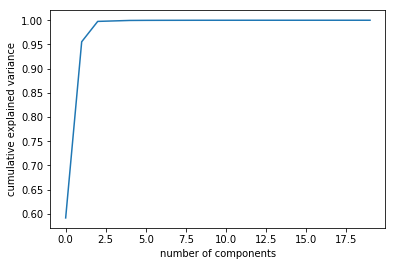

In [59]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Số chiều từ 3 trở lên đã có thể giữ được trên 96% thông tin.

Ta chọn số chiều cần giảm xuống là 4.

In [60]:
pca = PCA(4)
X_pca = pca.fit_transform(X)
X_pca.shape

(974835, 4)

In [61]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split( X_pca, y, test_size=0.2)

# Naïve Bayes with PCA

In [62]:
gnb = GaussianNB()
model = gnb.fit(X_train_pca, y_train)

In [63]:
model.score(X_test_pca, y_test)

0.8802156262341833

Độ chính xác giảm so với không dùng PCA do sự mất thông tin khi tiến hành PCA.

# Decision Tree with PCA

In [64]:
clf = tree.DecisionTreeClassifier()
model = clf.fit(X_train_pca, y_train)

In [65]:
model.score(X_test_pca, y_test)

0.8159637271948587

Độ chính xác giảm hơn 10% so với không sử dụng PCA do sự mất mát thông tin khi sử dụng PCA.

In [66]:
# tree.plot_tree(model)

# Random Forest with PCA

In [67]:
clf = RandomForestClassifier()
model = clf.fit(X_train_pca, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [68]:
model.score(X_test_pca, y_test)

0.8746557109664712

Độ chính xác giảm đi khoảng 10% so với không sử dụng PCA do mất mát 1 phần thông tin khi giảm chiều

### Sau khi sử dụng PCA giảm số chiều về 4, Naïve Bayes và Decision Tree có độ chính xác giảm lớn hơn 10%. Đối với Random Forest có độ chính xác tốt hơn.

# GridsearchCV

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Decision Tree

In [ ]:
clf = DecisionTreeClassifier()
parameters = {'max_features': ['sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [5, 10], 
              'min_samples_split': [5],
              'min_samples_leaf': [5,8]
             }
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train_pca, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train_pca, y_train)

In [ ]:
# clf = DecisionTreeClassifier()
# parameters = {'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10], 
#               'min_samples_split': [2, 3, 5],
#               'min_samples_leaf': [1,5,8]
#              }
# acc_scorer = make_scorer(accuracy_score)

# grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
# grid_obj = grid_obj.fit(X_train_pca, y_train)

# clf = grid_obj.best_estimator_

# clf.fit(X_train_pca, y_train)

In [ ]:
clf = grid_obj.best_estimator_

In [ ]:
predictions = clf.predict(X_test_pca)
print(accuracy_score(y_test, predictions))

Sử dụng GridSearchCV, độ chính xác tăng lên khoảng 5%.

## Random Forest

In [ ]:
clf = RandomForestClassifier()
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train_pca, y_train)

clf = grid_obj.best_estimator_

clf.fit(X_train_pca, y_train)

In [ ]:
predictions = clf.predict(X_test_pca)
print(accuracy_score(y_test, predictions))

# Conclusions

Naive Bayes, Decision Tree, Random Forest đều cho kết quả khá tốt khi không sử dụng PCA. Sau khi sử dụng PCA giảm số chiều từ 21 xuống còn 4 thì Random Forest hoạt động tốt nhất, có độ chính xác giảm đi không đáng kể (khỏang 1%), còn lại Naive Bayse và Decision Tree có độ chính xác giảm lớn hơn 8%.

---> Random Forest hoạt động tốt hơn so với Naive Bayse và Decision Tree.